In [42]:
import pandas as pd
# First, I am reading the csv file and extracting the data in readable format in order to make it easier to for processing.
data = pd.read_csv('recipe_data.csv')
recipe_sizes = data.groupby('ID').size()

print(recipe_sizes)

ID
1        24
2         9
3         7
4         5
5         8
         ..
10988     8
10989    17
10990     9
10991    10
10992     5
Length: 10992, dtype: int64


In [43]:
import numpy as np
# Then I am creating 10 random sets of the recipe sizes. This helps in random sampling which is being asked in question.
num_sets = 10
random_sets = []
for i in range(num_sets):
    random_recipe_set = np.random.permutation(recipe_sizes)
    random_sets.append(random_recipe_set)
random_sets_df = pd.DataFrame(random_sets).T

print(random_sets_df.head())

    0   1   2   3   4   5   6   7   8   9
0   9  16  13  13   4  14  12  13  13  11
1   5  10   7   1  13   7   6   8  14   9
2  11   5  14   6  14  11   8   6  11   6
3   7  13   9   2  10  11   8   4   9   9
4   8   4   2   5  10  13   6   7   7   6


## Plotting the graphs for recipe size distribution for 10 sets

Code for file for Size controlled cuisine and plotting recipe-size distribution for Original first followed by the randomly created recipes. 

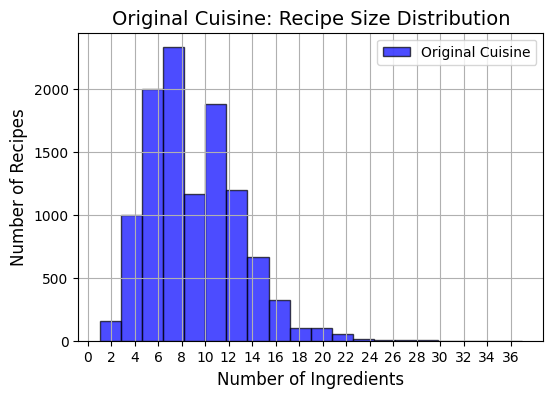

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(recipe_sizes, bins=20, edgecolor='black', alpha=0.7, color='blue', label='Original Cuisine')
plt.title('Original Cuisine: Recipe Size Distribution', fontsize=14)
plt.xlabel('Number of Ingredients', fontsize=12)
plt.ylabel('Number of Recipes', fontsize=12)

plt.xticks(np.arange(0, max(recipe_sizes) + 1, 2), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.savefig('original_cuisine_recipe_size_distribution.png', dpi=300)
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt

num_sets = 10
def create_plots(recipe_sizes, random_sets, plot_type):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.flatten()
    for i in range(num_sets):
        orig_hist, orig_bins = np.histogram(recipe_sizes, bins=20)
        rand_hist, rand_bins = np.histogram(random_sets[i], bins=20)
        orig_bin_centers = (orig_bins[:-1] + orig_bins[1:]) / 2
        rand_bin_centers = (rand_bins[:-1] + rand_bins[1:]) / 2
        if plot_type == 'bar':
            axes[i].bar(orig_bin_centers, orig_hist, width=0.8, alpha=0.7, color='blue', label='Original Cuisine')
            axes[i].bar(rand_bin_centers, rand_hist, width=0.8, alpha=0.5, color='orange', label=f'Random Cuisine Set {i+1}')
        elif plot_type == 'line':
            axes[i].plot(orig_bin_centers, orig_hist, '-o', alpha=0.7, color='blue', label='Original Cuisine')
            axes[i].plot(rand_bin_centers, rand_hist, '-o', alpha=0.5, color='orange', label=f'Random Cuisine Set {i+1}')
        axes[i].set_title(f'Random Cuisine Set {i+1}', fontsize=12)
        axes[i].set_xlabel('Number of Ingredients', fontsize=10)
        axes[i].set_ylabel('Number of Recipes', fontsize=10)
        axes[i].set_xticks(np.arange(0, max(recipe_sizes)+1, 2))
        axes[i].tick_params(axis='both', labelsize=8)
        axes[i].legend(fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'recipe_size_distribution_{plot_type}.png', dpi=300)
    plt.close()

create_plots(recipe_sizes, random_sets, 'bar')
create_plots(recipe_sizes, random_sets, 'line')
print("Plots have been saved as 'recipe_size_distribution_bar.png' and 'recipe_size_distribution_line.png'")

Plots have been saved as 'recipe_size_distribution_bar.png' and 'recipe_size_distribution_line.png'


# b) Using Inverse Transformation to create random recipes

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('recipe_data.csv')
recipe_sizes = df.groupby('ID').size().reset_index(name='recipe_size')
recipe_sizes_sorted = recipe_sizes.sort_values('recipe_size')
recipe_sizes_sorted['cdf'] = np.arange(1, len(recipe_sizes_sorted) + 1) / len(recipe_sizes_sorted)

def inverse_transform(u):
    idx = np.searchsorted(recipe_sizes_sorted['cdf'], u, side='right') - 1
    return int(recipe_sizes_sorted.iloc[idx]['recipe_size'])
num_original_recipes = len(recipe_sizes)
random_cuisines_sets = []
for _ in range(10): 
    u = np.random.random(num_original_recipes)
    random_sizes = [inverse_transform(ui) for ui in u]
    random_cuisines_sets.append(random_sizes)
plt.figure(figsize=(12, 6))
original_sizes, original_counts = np.unique(recipe_sizes['recipe_size'], return_counts=True)
plt.plot(original_sizes, original_counts / len(recipe_sizes), 'k-', label='Original Cuisine', linewidth=2)
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
for i, random_cuisines in enumerate(random_cuisines_sets):
    random_sizes, random_counts = np.unique(random_cuisines, return_counts=True)
    plt.plot(random_sizes, random_counts / len(random_cuisines), '-', color=colors[i], 
             label=f'Random Cuisine Set {i+1}', alpha=0.7, linewidth=1)
plt.xlabel('Number of Ingredients')
plt.ylabel('Probability')
plt.title('Recipe Size Distribution: Original vs. 10 Sets of Random Cuisines (Line Graph)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(int(min(original_sizes)), int(max(original_sizes))+1))
plt.tight_layout()
plt.savefig('recipe_size_distribution_10sets_line.png', dpi=300, bbox_inches='tight')
plt.close()
plt.figure(figsize=(12, 6))
plt.bar(original_sizes, original_counts / len(recipe_sizes), color='blue', alpha=0.7, label='Original Cuisine')
avg_random_counts = np.zeros_like(original_counts, dtype=float)
for random_cuisines in random_cuisines_sets:
    random_sizes, random_counts = np.unique(random_cuisines, return_counts=True)
    for size, count in zip(random_sizes, random_counts):
        idx = np.where(original_sizes == size)[0]
        if len(idx) > 0:
            avg_random_counts[idx[0]] += count / len(random_cuisines_sets)

plt.bar(original_sizes, avg_random_counts / len(recipe_sizes), color='red', alpha=0.5, label='Random Cuisine')

plt.xlabel('Number of Ingredients')
plt.ylabel('Probability')
plt.title('Recipe Size Distribution: Original vs. Average of 10 Random Cuisines (Bar Graph)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.xticks(range(int(min(original_sizes)), int(max(original_sizes))+1))
plt.tight_layout()
plt.savefig('recipe_size_distribution_10sets_bar.png', dpi=300, bbox_inches='tight')
plt.close()

print("Line graph saved as 'recipe_size_distribution_10sets_line.png'")
print("Bar graph saved as 'recipe_size_distribution_10sets_bar.png'")

Line graph saved as 'recipe_size_distribution_10sets_line.png'
Bar graph saved as 'recipe_size_distribution_10sets_bar.png'
